In [1]:
!pip3 install librosa

In [2]:
import matplotlib.pyplot as plt

In [3]:
filename='/home/ramandeep/Desktop/Coding/UrbanSound8K/audio/fold1/51022-3-29-0.wav'

In [4]:
import IPython.display as ipd
import librosa
import librosa.display

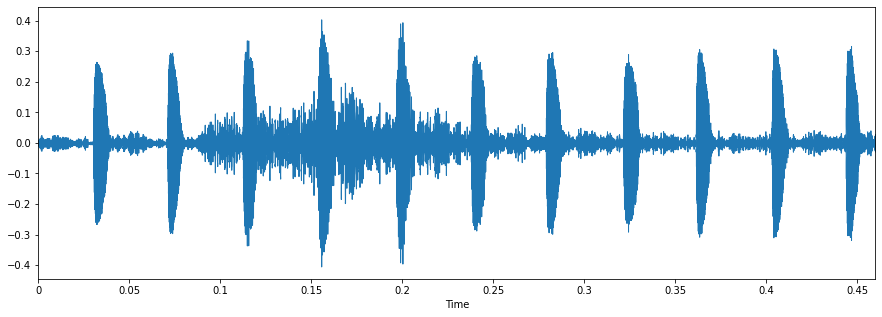

In [5]:
plt.figure(figsize=(15,5))
data,sr=librosa.load(filename)
librosa.display.waveplot(data,sr)
ipd.Audio(filename)

In [6]:
from scipy.io import wavfile as wav
wave_sample_rate,wave_audio=wav.read(filename)

In [9]:
wave_sample_rate

44100

In [7]:
import pandas as pd 
help(pd)

Help on package pandas:

NAME
    pandas

DESCRIPTION
    pandas - a powerful data analysis and manipulation library for Python
    
    **pandas** is a Python package providing fast, flexible, and expressive data
    structures designed to make working with "relational" or "labeled" data both
    easy and intuitive. It aims to be the fundamental high-level building block for
    doing practical, **real world** data analysis in Python. Additionally, it has
    the broader goal of becoming **the most powerful and flexible open source data
    analysis / manipulation tool available in any language**. It is already well on
    its way toward this goal.
    
    Main Features
    -------------
    Here are just a few of the things that pandas does well:
    
      - Easy handling of missing data in floating point as well as non-floating
        point data.
      - Size mutability: columns can be inserted and deleted from DataFrame and
        higher dimensional objects
      - Automatic an

In [8]:
import numpy as np
!pip3 install tqdm
from tqdm import tqdm

In [9]:
def feature_ext(file):
    audio,sr=librosa.load(file,res_type='kaiser_fast')
    mfccs_features=librosa.feature.mfcc(audio,sr,n_mfcc=40)
    mfccs_scale=np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scale
    
    

In [10]:
import os

In [11]:
audio_path='/home/ramandeep/Desktop/Coding/UrbanSound8K/audio'
metadata=pd.read_csv('/home/ramandeep/Desktop/Coding/UrbanSound8K/metadata/UrbanSound8K.csv')

In [18]:
metadata

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn


In [13]:
extracted_feat=[]
for index,row in tqdm(metadata.iterrows()):
    filename=os.path.join(os.path.abspath(audio_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class=row["class"]
    data = feature_ext(filename)
    extracted_feat.append([data,final_class])
    

3555it [06:46,  9.54it/s]/home/ramandeep/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1323
  warnings.warn(
8324it [15:08, 13.10it/s]/home/ramandeep/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1103
  warnings.warn(
8328it [15:08, 18.43it/s]/home/ramandeep/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1523
  warnings.warn(
8732it [15:51,  9.18it/s]


In [14]:
final_feature_dataframe = pd.DataFrame(extracted_feat,columns=['feat','class'])
final_feature_dataframe

,feat,class
0,"[-215.79301, 71.66612, -131.81377, -52.091328,...",dog_bark
1,"[-424.68677, 110.56227, -54.148235, 62.01074, ...",children_playing
2,"[-459.56467, 122.80034, -47.92471, 53.265694, ...",children_playing
3,"[-414.55377, 102.896904, -36.664955, 54.18041,...",children_playing
4,"[-447.397, 115.0954, -53.809113, 61.608585, 1....",children_playing
...,...,...
8727,"[-399.2257, 136.81902, -51.964222, 37.02399, -...",car_horn
8728,"[-346.72733, 87.48847, -46.265022, 52.748833, ...",car_horn
8729,"[-304.61316, 112.6199, -47.161945, 37.00349, -...",car_horn
8730,"[-344.71423, 126.75813, -56.17717, 36.070927, ...",car_horn


In [15]:
X=np.array(final_feature_dataframe['feat'].tolist())
y=np.array(final_feature_dataframe['class'].tolist())

In [16]:
from sklearn.preprocessing import LabelEncoder
label_encoder= LabelEncoder()
y=np.array(pd.get_dummies(y))

In [30]:
y.unique()

AttributeError: 'numpy.ndarray' object has no attribute 'unique'

In [17]:
from sklearn.model_selection import train_test_split
X_tr,X_te,y_tr,y_te=train_test_split(X,y,test_size=.2)

In [19]:
import tensorflow as tf
tf.__version__

'2.3.1'

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout, Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [27]:
model=Sequential()
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(150))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(10))
model.add(Activation('softmax'))


In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               4100      
_________________________________________________________________
activation_1 (Activation)    (None, 100)               0         
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 150)               15150     
_________________________________________________________________
activation_2 (Activation)    (None, 150)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [29]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [31]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

no_epochs=100
no_batch_size=32

checkpointer =ModelCheckpoint(filepath='/home/ramandeep/Desktop/Coding/Python/mlaudio/audio.hdf5',verbose=1, save_best_only=True)

start= datetime.now()

model.fit(X_tr,y_tr,batch_size=no_batch_size, epochs= no_epochs, validation_data= (X_te,y_te), callbacks =[checkpointer], verbose =1)

duration=datetime.now()-start

print("Time:",duration)


Epoch 1/100
194/219 [=========================>....] - ETA: 0s - loss: 15.6831 - accuracy: 0.1572
Epoch 00001: val_loss improved from inf to 2.08844, saving model to /home/ramandeep/Desktop/Coding/Python/mlaudio/audio.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 14.4092 - accuracy: 0.1586 - val_loss: 2.0884 - val_accuracy: 0.2484
Epoch 2/100
199/219 [==========================>...] - ETA: 0s - loss: 2.8969 - accuracy: 0.2078
Epoch 00002: val_loss did not improve from 2.08844
219/219 [==============================] - 0s 1ms/step - loss: 2.8524 - accuracy: 0.2102 - val_loss: 2.1032 - val_accuracy: 0.2244
Epoch 3/100
216/219 [============================>.] - ETA: 0s - loss: 2.2725 - accuracy: 0.2416
Epoch 00003: val_loss improved from 2.08844 to 2.03559, saving model to /home/ramandeep/Desktop/Coding/Python/mlaudio/audio.hdf5
219/219 [==============================] - 0s 1ms/step - loss: 2.2713 - accuracy: 0.2415 - val_loss: 2.0356 - val_accuracy: 0.2851
Epoch 4/1

Epoch 25/100
184/219 [========================>.....] - ETA: 0s - loss: 1.1767 - accuracy: 0.5921
Epoch 00025: val_loss improved from 0.97461 to 0.95363, saving model to /home/ramandeep/Desktop/Coding/Python/mlaudio/audio.hdf5
219/219 [==============================] - 0s 1ms/step - loss: 1.1654 - accuracy: 0.5956 - val_loss: 0.9536 - val_accuracy: 0.7018
Epoch 26/100
178/219 [=======================>......] - ETA: 0s - loss: 1.1427 - accuracy: 0.6096
Epoch 00026: val_loss improved from 0.95363 to 0.94601, saving model to /home/ramandeep/Desktop/Coding/Python/mlaudio/audio.hdf5
219/219 [==============================] - 0s 2ms/step - loss: 1.1360 - accuracy: 0.6106 - val_loss: 0.9460 - val_accuracy: 0.7064
Epoch 27/100
217/219 [============================>.] - ETA: 0s - loss: 1.1254 - accuracy: 0.6079
Epoch 00027: val_loss improved from 0.94601 to 0.92850, saving model to /home/ramandeep/Desktop/Coding/Python/mlaudio/audio.hdf5
219/219 [==============================] - 0s 2ms/step - 

Epoch 49/100
182/219 [=======================>......] - ETA: 0s - loss: 0.9661 - accuracy: 0.6655
Epoch 00049: val_loss improved from 0.78218 to 0.78047, saving model to /home/ramandeep/Desktop/Coding/Python/mlaudio/audio.hdf5
219/219 [==============================] - 0s 2ms/step - loss: 0.9588 - accuracy: 0.6664 - val_loss: 0.7805 - val_accuracy: 0.7613
Epoch 50/100
218/219 [============================>.] - ETA: 0s - loss: 0.9550 - accuracy: 0.6704
Epoch 00050: val_loss did not improve from 0.78047
219/219 [==============================] - 0s 1ms/step - loss: 0.9551 - accuracy: 0.6706 - val_loss: 0.7994 - val_accuracy: 0.7733
Epoch 51/100
208/219 [===========================>..] - ETA: 0s - loss: 0.9681 - accuracy: 0.6653
Epoch 00051: val_loss improved from 0.78047 to 0.77619, saving model to /home/ramandeep/Desktop/Coding/Python/mlaudio/audio.hdf5
219/219 [==============================] - 0s 2ms/step - loss: 0.9714 - accuracy: 0.6640 - val_loss: 0.7762 - val_accuracy: 0.7665
Epoc

Epoch 76/100
174/219 [======================>.......] - ETA: 0s - loss: 0.9071 - accuracy: 0.6884
Epoch 00076: val_loss did not improve from 0.69339
219/219 [==============================] - 0s 1ms/step - loss: 0.9059 - accuracy: 0.6892 - val_loss: 0.6982 - val_accuracy: 0.7979
Epoch 77/100
217/219 [============================>.] - ETA: 0s - loss: 0.8899 - accuracy: 0.6943
Epoch 00077: val_loss improved from 0.69339 to 0.68393, saving model to /home/ramandeep/Desktop/Coding/Python/mlaudio/audio.hdf5
219/219 [==============================] - 0s 2ms/step - loss: 0.8880 - accuracy: 0.6948 - val_loss: 0.6839 - val_accuracy: 0.7922
Epoch 78/100
219/219 [==============================] - ETA: 0s - loss: 0.9048 - accuracy: 0.6903
Epoch 00078: val_loss did not improve from 0.68393
219/219 [==============================] - 0s 2ms/step - loss: 0.9048 - accuracy: 0.6903 - val_loss: 0.7089 - val_accuracy: 0.7951
Epoch 79/100
216/219 [============================>.] - ETA: 0s - loss: 0.8806 - a

In [32]:
metadata

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn
